In [27]:
import numpy as np
import pandas as pd_1
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import mode 

df_1 = pd_1.read_csv("Death_Claim_2018-2019_1.csv")

df_1 = df_1.dropna()

In [28]:
df_1.head()

,Life Insurer,Year,Claims pending at start of the period's No.,Claims pending at start of the period's Amt.,Claims intimated / booked No.,Claims pending at start of the period Amt.,Total Claims No.,Total Claims Amt.,Claims paid No.,Claims paid Amt.,...,Claims Unclaimed No.,Claims Unclaimed Amt.,Claims pending at end of the period No.,Claims pending at end of the period Amt.,Claims Paid Ratio % No.,Claims Paid Ratio % Amt.,Claims Repudiated/ Rejected Ratio % No.,Claims Repudiated/ Rejected Ratio % Amt.,Claims Pending Ratio % No.,Claims Pending Ratio % Amt.
0,Aditya Birla Life **,2018-19,23.0,3.59,8822.0,205.84,8845.0,209.43,8817.0,204.28,...,0.0,0.00,15.0,4.04,99.68%,97.54%,0.15%,0.53%,0.17%,1.93%
1,Aegon,2018-19,0.0,0.00,74.0,6.30,74.0,6.30,74.0,6.30,...,0.0,0.00,0.0,0.00,100.00%,100.00%,0.00%,0.00%,0.00%,0.00%
2,Aviva,2018-19,0.0,0.00,888.0,16.15,888.0,16.15,882.0,16.00,...,0.0,0.00,0.0,0.00,99.32%,99.07%,0.68%,0.93%,0.00%,0.00%
3,Bajaj Allianz,2018-19,448.0,5.49,170885.0,736.66,171333.0,742.14,170800.0,726.26,...,4.0,0.03,172.0,0.91,99.69%,97.86%,0.21%,2.01%,0.10%,0.12%
4,Bharti Axa,2018-19,6.0,3.36,351.0,36.62,357.0,39.98,352.0,38.98,...,0.0,0.00,1.0,0.26,98.60%,97.50%,1.12%,1.84%,0.28%,0.66%


In [29]:
df_1.shape

(13, 24)

In [30]:
df_1.tail(4)


,Life Insurer,Year,Claims pending at start of the period's No.,Claims pending at start of the period's Amt.,Claims intimated / booked No.,Claims pending at start of the period Amt.,Total Claims No.,Total Claims Amt.,Claims paid No.,Claims paid Amt.,...,Claims Unclaimed No.,Claims Unclaimed Amt.,Claims pending at end of the period No.,Claims pending at end of the period Amt.,Claims Paid Ratio % No.,Claims Paid Ratio % Amt.,Claims Repudiated/ Rejected Ratio % No.,Claims Repudiated/ Rejected Ratio % Amt.,Claims Pending Ratio % No.,Claims Pending Ratio % Amt.
9,HDFC Life,2018-19,321.0,10.52,163196.0,954.08,163517.0,964.60,162383.0,905.34,...,0.0,0.0,524.0,12.64,99.31%,93.86%,0.37%,4.83%,0.32%,1.31%
10,ICICI Prudential,2018-19,21.0,0.64,21109.0,263.26,21130.0,263.90,19917.0,247.90,...,0.0,0.0,1174.0,12.36,94.26%,93.93%,0.18%,1.38%,5.56%,4.68%
11,Ageas Federal,2018-19,0.0,0.00,1241.0,24.41,1241.0,24.41,1231.0,22.19,...,0.0,0.0,0.0,0.00,99.19%,90.93%,0.81%,9.07%,0.00%,0.00%
12,India First,2018-19,3.0,0.09,9208.0,232.59,9211.0,232.68,8711.0,217.05,...,0.0,0.0,1.0,0.72,94.57%,93.28%,5.42%,6.41%,0.01%,0.31%


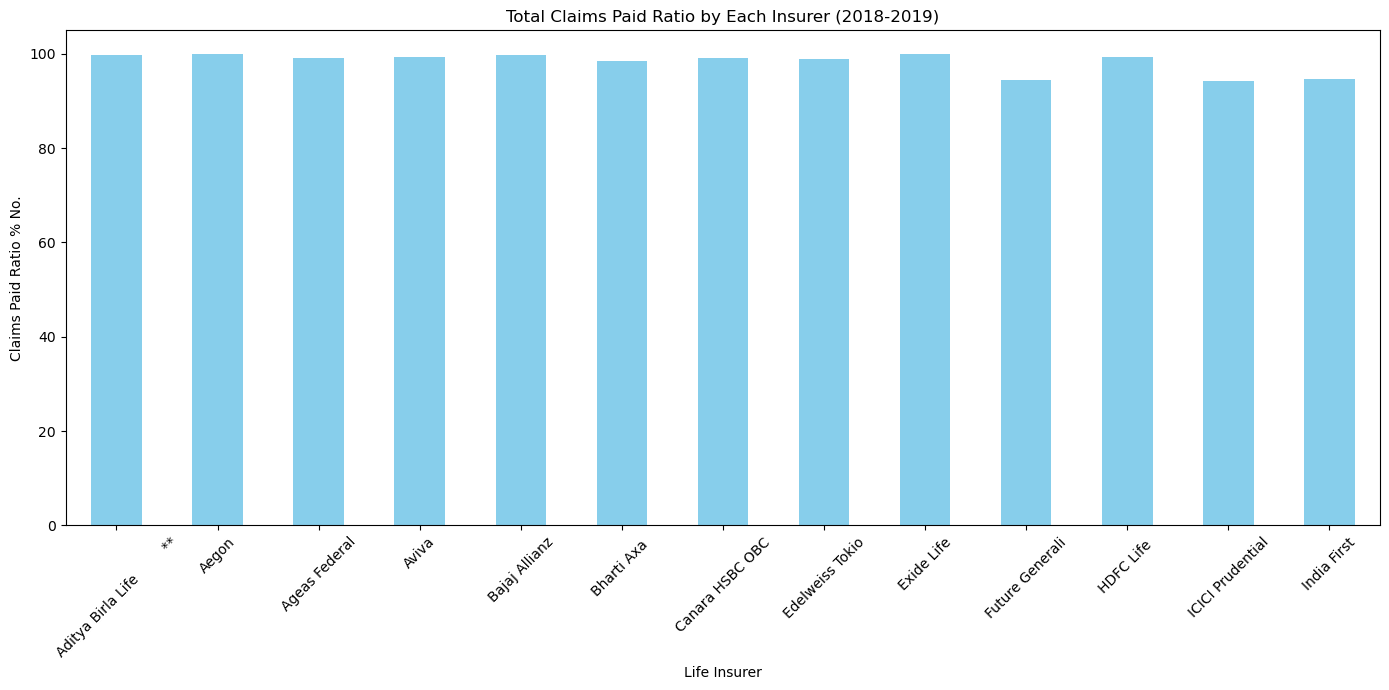

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

df_1["Claims Paid Ratio % No."] = df_1["Claims Paid Ratio % No."].str.replace('%', '').astype(float)
grouped_df = df_1.groupby('Life Insurer')['Claims Paid Ratio % No.'].sum()

# Plot the data
plt.figure(figsize=(14, 7))

# Create a bar plot with insurers on the x-axis and the total claims paid on the y-axis
grouped_df.plot(kind='bar', color='skyblue')

# Add labels and title
plt.xlabel('Life Insurer')
plt.ylabel('Claims Paid Ratio % No.')
plt.title('Total Claims Paid Ratio by Each Insurer (2018-2019)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

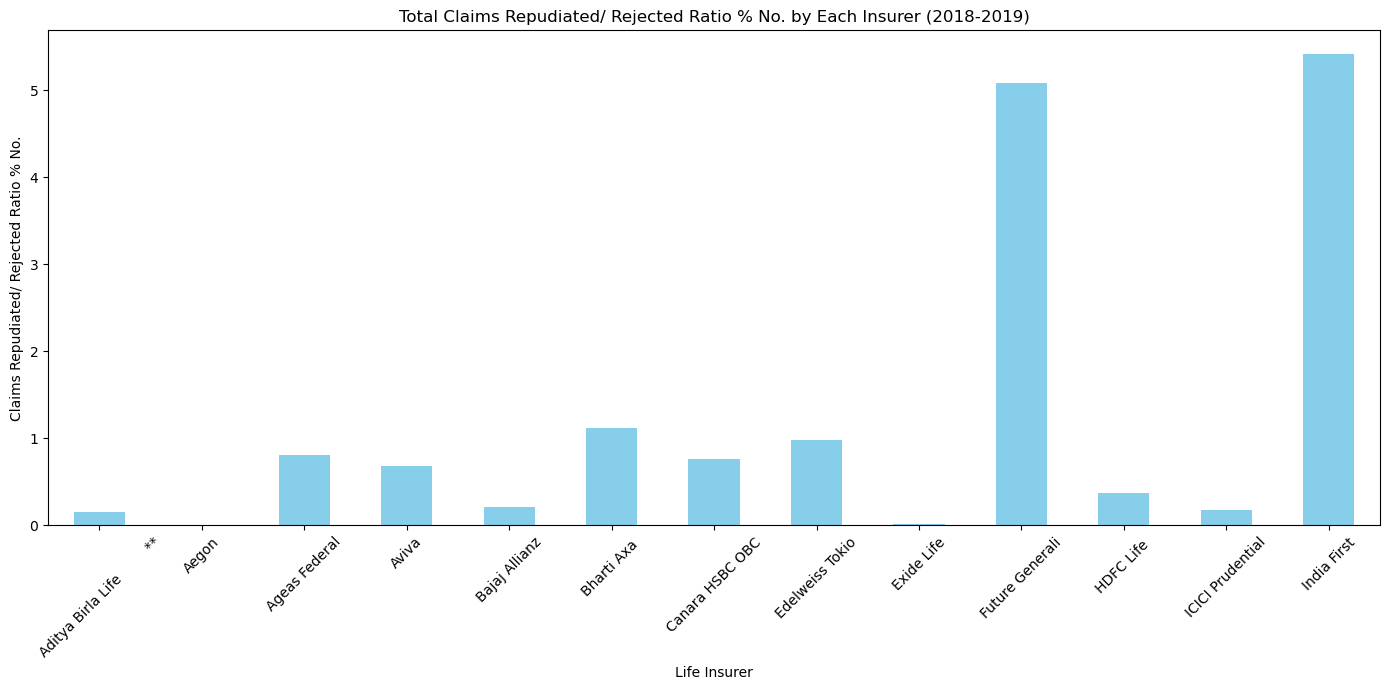

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

df_1["Claims Repudiated/ Rejected Ratio % No."] = df_1["Claims Repudiated/ Rejected Ratio % No."].str.replace('%', '').astype(float)
grouped_df = df_1.groupby('Life Insurer')['Claims Repudiated/ Rejected Ratio % No.'].sum()

# Plot the data
plt.figure(figsize=(14, 7))

# Create a bar plot with insurers on the x-axis and the total claims paid on the y-axis
grouped_df.plot(kind='bar', color='skyblue')

# Add labels and title
plt.xlabel('Life Insurer')
plt.ylabel('Claims Repudiated/ Rejected Ratio % No.')
plt.title('Total Claims Repudiated/ Rejected Ratio % No. by Each Insurer (2018-2019)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

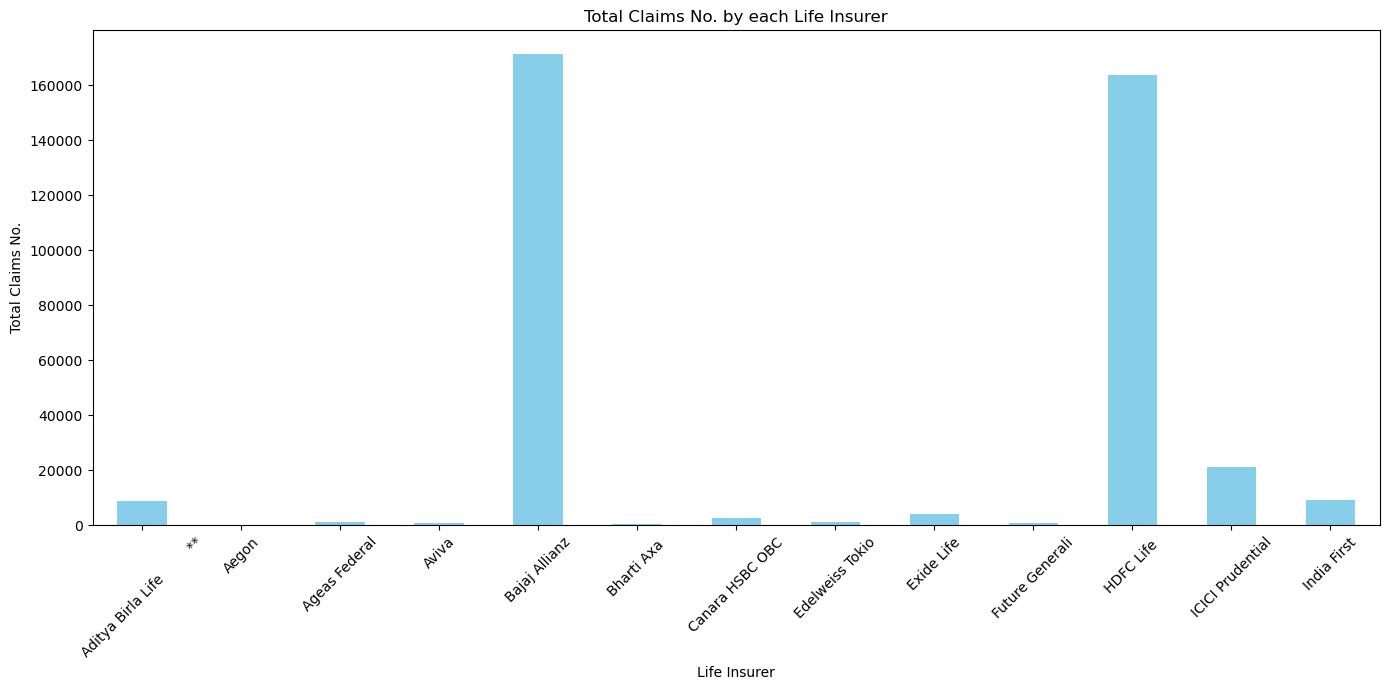

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

grouped_df = df_1.groupby('Life Insurer')['Total Claims No.'].sum()

# Plot the data
plt.figure(figsize=(14, 7))

# Create a bar plot with insurers on the x-axis and the total claims paid on the y-axis
grouped_df.plot(kind='bar', color='skyblue')


plt.xlabel('Life Insurer')
plt.ylabel('Total Claims No.')
plt.title('Total Claims No. by each Life Insurer')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

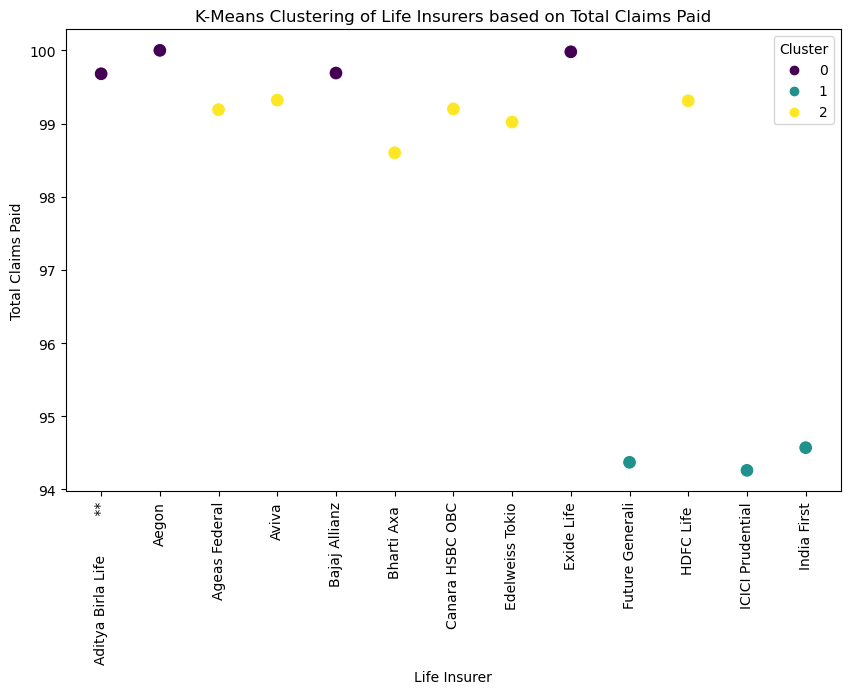

                    Life Insurer  Total Claims Paid  Cluster
0   Aditya Birla Life         **              99.68        0
1                          Aegon             100.00        0
2                  Ageas Federal              99.19        2
3                          Aviva              99.32        2
4                  Bajaj Allianz              99.69        0
5                    Bharti Axa               98.60        2
6                Canara HSBC OBC              99.20        2
7                Edelweiss Tokio              99.02        2
8                     Exide Life              99.98        0
9                Future Generali              94.37        1
10                    HDFC Life               99.31        2
11              ICICI Prudential              94.26        1
12                   India First              94.57        1


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Death_Claim_2018-2019_1.csv")
df["Claims Paid Ratio % No."] = df["Claims Paid Ratio % No."].str.replace('%', '').astype(float)

# Group by "Life Insurer" and aggregate Claims Paid
insurer_claims = df.groupby("Life Insurer")["Claims Paid Ratio % No."].sum().reset_index()
insurer_claims.columns = ['Life Insurer', 'Total Claims Paid']

# Extract the values we will cluster on
data = insurer_claims['Total Claims Paid'].values.reshape(-1, 1)

class KMeansScratch:
    def __init__(self, k, max_iters=100):
        self.k = k
        self.max_iters = max_iters
        self.centroids = None

    def initialize_centroids(self, data):
        random_indices = np.random.choice(data.shape[0], self.k, replace=False)
        centroids = data[random_indices]
        return centroids

    def assign_clusters(self, data, centroids):
        distances = np.sqrt(((data - centroids[:, np.newaxis])**2).sum(axis=2))
        return np.argmin(distances, axis=0)

    def update_centroids(self, data, labels):
        new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(self.k)])
        return new_centroids

    def fit(self, data):
        """Run the K-Means algorithm."""
        self.centroids = self.initialize_centroids(data)

        for i in range(self.max_iters):
            # Step 1: Assign clusters
            labels = self.assign_clusters(data, self.centroids)
            
            # Step 2: Update centroids
            new_centroids = self.update_centroids(data, labels)

            # Step 3: Check for convergence (centroids stop changing)
            if np.all(self.centroids == new_centroids):
                break

            self.centroids = new_centroids

        return labels

# Initialize KMeans model (k=3 clusters)
kmeans_model = KMeansScratch(k=3)
labels = kmeans_model.fit(data)

# Add the cluster labels to the original insurer_claims DataFrame
insurer_claims['Cluster'] = labels

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Life Insurer', y='Total Claims Paid', hue='Cluster', data=insurer_claims, palette='viridis', s=100)
plt.xticks(rotation=90)
plt.title('K-Means Clustering of Life Insurers based on Total Claims Paid')
plt.show()

# Print the clusters
print(insurer_claims)


Iteration 0: Cost = 4363870234.230769, m = 4206.5, b = 592.6138461538462
Iteration 100: Cost = 3431592290.408459, m = 3371.8202540563384, b = 7003.848967201177
Iteration 200: Cost = 3417308260.279594, m = 2926.552864816581, b = 10693.92798539035
Iteration 300: Cost = 3412587028.164601, m = 2670.5627549678898, b = 12815.403206895868
Iteration 400: Cost = 3411026541.909493, m = 2523.390655856317, b = 14035.067364025615
Iteration 500: Cost = 3410510761.8560925, m = 2438.779470019064, b = 14736.268415589793
Iteration 600: Cost = 3410340283.543571, m = 2390.135380466745, b = 15139.398172121935
Iteration 700: Cost = 3410283936.162844, m = 2362.1692501618763, b = 15371.162799740716
Iteration 800: Cost = 3410265311.9327717, m = 2346.09115205321, b = 15504.407348784549
Iteration 900: Cost = 3410259156.155141, m = 2336.847640849701, b = 15581.011401923735


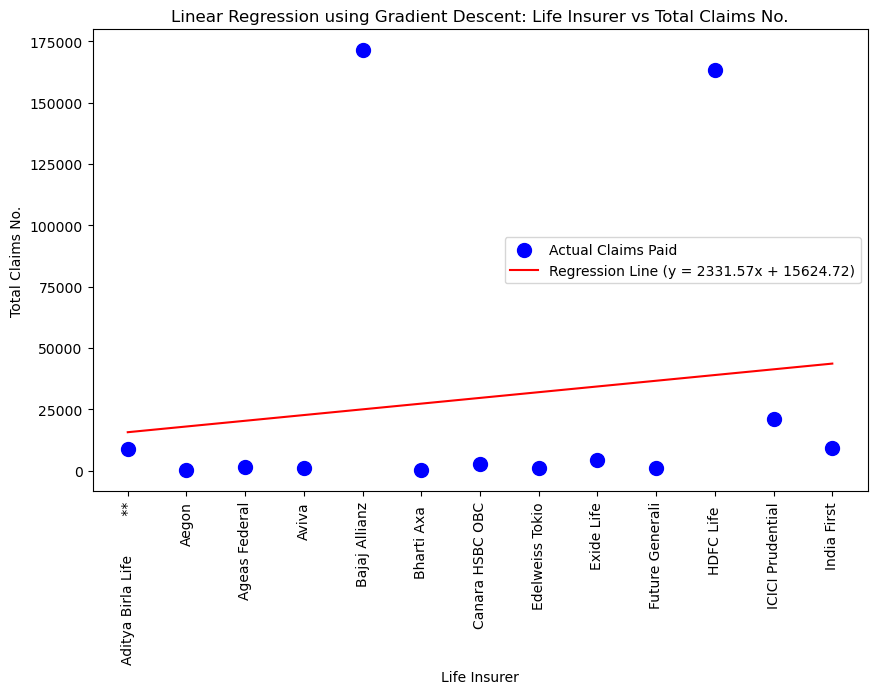

Final slope (m): 2331.57331848485
Final intercept (b): 15624.721466401917


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("Death_Claim_2018-2019_1.csv")
# Group by "Life Insurer" and aggregate Claims Paid
insurer_claims = df.groupby("Life Insurer")["Total Claims No."].sum().reset_index()
insurer_claims.columns = ['Life Insurer', 'Total Claims No.']

# Encode the categorical variable "Life Insurer"
insurer_claims['Insurer_Code'] = np.arange(len(insurer_claims))

# Extract the encoded "Life Insurer" (X) and "Total Claims Paid" (Y)
X = insurer_claims['Insurer_Code'].values
Y = insurer_claims['Total Claims No.'].values

# Initialize parameters for gradient descent
m = 0  # Slope (weight)
b = 0  # Intercept (bias)
learning_rate = 0.01
iterations = 1000
n = len(X)

# Gradient descent algorithm
def gradient_descent(X, Y, m, b, learning_rate, iterations):
    for i in range(iterations):
        # Make predictions
        Y_pred = m * X + b
        
        # Calculate the gradients
        dm = -(2/n) * np.sum(X * (Y - Y_pred))  # Gradient w.r.t. m
        db = -(2/n) * np.sum(Y - Y_pred)        # Gradient w.r.t. b
        
        # Update the parameters
        m = m - learning_rate * dm
        b = b - learning_rate * db
        
        # Optionally, print the cost at every 100th iteration to monitor convergence
        if i % 100 == 0:
            cost = np.mean((Y - Y_pred) ** 2)  # Mean Squared Error
            print(f"Iteration {i}: Cost = {cost}, m = {m}, b = {b}")
    
    return m, b

# Run gradient descent
m, b = gradient_descent(X, Y, m, b, learning_rate, iterations)

# Predict Y values using the optimized m and b
Y_pred = m * X + b

# Plot the actual data points
plt.figure(figsize=(10, 6))
plt.scatter(insurer_claims['Life Insurer'], Y, color='blue', label='Actual Claims Paid', s=100)

# Plot the regression line
plt.plot(insurer_claims['Life Insurer'], Y_pred, color='red', label=f'Regression Line (y = {m:.2f}x + {b:.2f})')

# Customize the plot
plt.xticks(rotation=90)
plt.xlabel('Life Insurer')
plt.ylabel('Total Claims No.')
plt.title('Linear Regression using Gradient Descent: Life Insurer vs Total Claims No.')
plt.legend()

# Display the plot
plt.show()

# Print the final slope and intercept
print(f"Final slope (m): {m}")
print(f"Final intercept (b): {b}")


Iteration 0: Cost = 9656.729484615384, m = 11.677553846153849, b = 1.9649076923076925
Iteration 100: Cost = 913.9819659480908, m = 6.447341803254705, b = 43.90006436934505
Iteration 200: Cost = 303.65944547544836, m = 3.5367908400685506, b = 68.02076869256331
Iteration 300: Cost = 101.93246379285557, m = 1.8634766050908638, b = 81.88808055627503
Iteration 400: Cost = 35.256610004509, m = 0.9014661251527826, b = 89.86058151431429
Iteration 500: Cost = 13.218559163099895, m = 0.3483935795630162, b = 94.44407773554406
Iteration 600: Cost = 5.934427692804249, m = 0.030424859820140343, b = 97.07919032074143
Iteration 700: Cost = 3.5268385798480995, m = -0.1523795616633192, b = 98.59415139008914
Iteration 800: Cost = 2.7310696730864423, m = -0.2574762407986965, b = 99.4651225412012
Iteration 900: Cost = 2.4680479848918755, m = -0.3178977113279712, b = 99.965855372835
Predicted values (Y_pred):
[100.25157217  99.89919813  99.54682409  99.19445005  98.84207601
  98.48970197  98.13732794  97.78

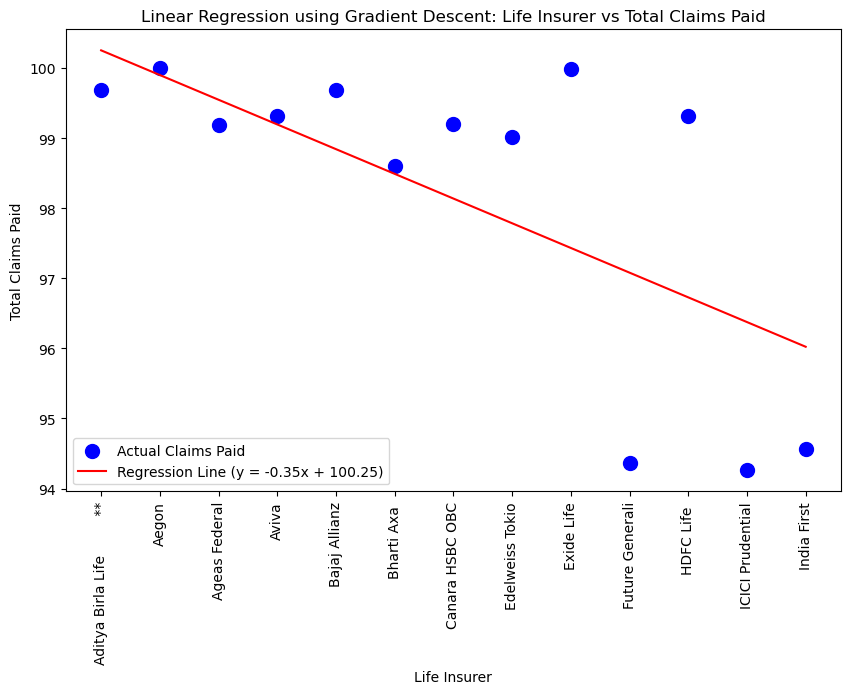

Final slope (m): -0.35237403816021756
Final intercept (b): 100.25157216535628


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("Death_Claim_2018-2019_1.csv")

# Convert "Claims Paid Ratio % No." from string to float by removing '%'
df["Claims Paid Ratio % No."] = df["Claims Paid Ratio % No."].str.replace('%', '').astype(float)

# Group by "Life Insurer" and aggregate Claims Paid
insurer_claims = df.groupby("Life Insurer")["Claims Paid Ratio % No."].sum().reset_index()
insurer_claims.columns = ['Life Insurer', 'Total Claims Paid']

# Encode the categorical variable "Life Insurer"
insurer_claims['Insurer_Code'] = np.arange(len(insurer_claims))

# Extract the encoded "Life Insurer" (X) and "Total Claims Paid" (Y)
X = insurer_claims['Insurer_Code'].values
Y = insurer_claims['Total Claims Paid'].values

# Initialize parameters for gradient descent
m = 0  # Slope (weight)
b = 0  # Intercept (bias)
learning_rate = 0.01
iterations = 1000
n = len(X)

# Gradient descent algorithm
def gradient_descent(X, Y, m, b, learning_rate, iterations):
    for i in range(iterations):
        # Make predictions
        Y_pred = m * X + b
        
        # Calculate the gradients
        dm = -(2/n) * np.sum(X * (Y - Y_pred))  # Gradient w.r.t. m
        db = -(2/n) * np.sum(Y - Y_pred)        # Gradient w.r.t. b
        
        # Update the parameters
        m = m - learning_rate * dm
        b = b - learning_rate * db
        
        # Optionally, print the cost at every 100th iteration to monitor convergence
        if i % 100 == 0:
            cost = np.mean((Y - Y_pred) ** 2)  # Mean Squared Error
            print(f"Iteration {i}: Cost = {cost}, m = {m}, b = {b}")
    
    return m, b

# Run gradient descent
m, b = gradient_descent(X, Y, m, b, learning_rate, iterations)

# Predict Y values using the optimized m and b
Y_pred = m * X + b

# Print the predicted values
print("Predicted values (Y_pred):")
print(Y_pred)

# Plot the actual data points
plt.figure(figsize=(10, 6))
plt.scatter(insurer_claims['Life Insurer'], Y, color='blue', label='Actual Claims Paid', s=100)

# Plot the regression line
plt.plot(insurer_claims['Life Insurer'], Y_pred, color='red', label=f'Regression Line (y = {m:.2f}x + {b:.2f})')

# Customize the plot
plt.xticks(rotation=90)
plt.xlabel('Life Insurer')
plt.ylabel('Total Claims Paid')
plt.title('Linear Regression using Gradient Descent: Life Insurer vs Total Claims Paid')
plt.legend()

# Display the plot
plt.show()

# Print the final slope and intercept
print(f"Final slope (m): {m}")
print(f"Final intercept (b): {b}")

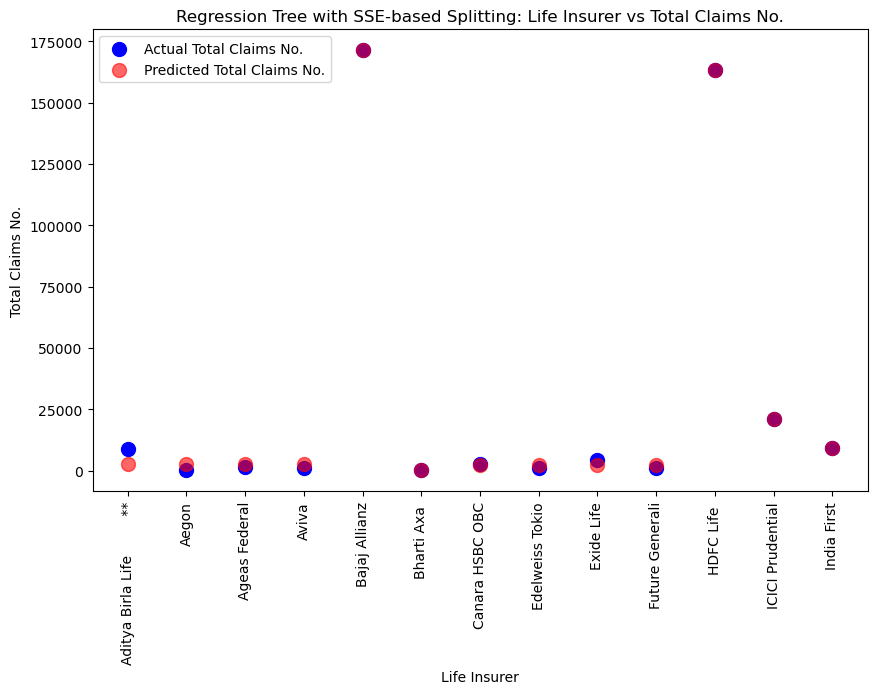

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("Death_Claim_2018-2019_1.csv")


# Group by "Life Insurer" and aggregate Claims Paid
insurer_claims = df.groupby("Life Insurer")["Total Claims No."].sum().reset_index()
insurer_claims.columns = ['Life Insurer', 'Total Claims No.']

# Encode the categorical variable "Life Insurer"
insurer_claims['Insurer_Code'] = np.arange(len(insurer_claims))

# Extract the encoded "Life Insurer" (X) and "Total Claims Paid" (Y)
X = insurer_claims[['Insurer_Code']].values  # X should be 2D for consistent shape
Y = insurer_claims['Total Claims No.'].values

class RegressionTree:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.tree = None

    def fit(self, X, Y):
        self.tree = self._build_tree(X, Y)

    def _build_tree(self, X, Y, depth=0):
        num_samples, num_features = X.shape
        if num_samples == 0 or (self.max_depth and depth >= self.max_depth):
            return np.mean(Y)

        best_split = self._find_best_split(X, Y)
        if best_split is None:
            return np.mean(Y)

        left_indices = X[:, best_split['feature']] < best_split['threshold']
        right_indices = X[:, best_split['feature']] >= best_split['threshold']

        left_branch = self._build_tree(X[left_indices], Y[left_indices], depth + 1)
        right_branch = self._build_tree(X[right_indices], Y[right_indices], depth + 1)

        return {
            'feature': best_split['feature'],
            'threshold': best_split['threshold'],
            'left': left_branch,
            'right': right_branch
        }

    def _find_best_split(self, X, Y):
        best_sse_reduction = -float('inf')
        best_split = None
        num_samples, num_features = X.shape

        sse_total = self._sum_squared_error(Y)

        for feature in range(num_features):
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                left_indices = X[:, feature] < threshold
                right_indices = X[:, feature] >= threshold

                if len(Y[left_indices]) == 0 or len(Y[right_indices]) == 0:
                    continue

                sse_left = self._sum_squared_error(Y[left_indices])
                sse_right = self._sum_squared_error(Y[right_indices])
                sse_reduction = sse_total - (sse_left + sse_right)

                if sse_reduction > best_sse_reduction:
                    best_sse_reduction = sse_reduction
                    best_split = {'feature': feature, 'threshold': threshold}

        return best_split

    def _sum_squared_error(self, Y):
        mean_Y = np.mean(Y)
        return np.sum((Y - mean_Y) ** 2)

    def predict(self, X):
        return np.array([self._predict_single(sample, self.tree) for sample in X])

    def _predict_single(self, sample, tree):
        if isinstance(tree, dict):
            feature = tree['feature']
            threshold = tree['threshold']
            if sample[feature] < threshold:
                return self._predict_single(sample, tree['left'])
            else:
                return self._predict_single(sample, tree['right'])
        else:
            return tree

# Initialize and fit the Regression Tree
model = RegressionTree(max_depth=3)
model.fit(X, Y)

# Predict Y values using the fitted model
Y_pred = model.predict(X)

# Plot the actual data points
plt.figure(figsize=(10, 6))
plt.scatter(insurer_claims['Insurer_Code'], Y, color='blue', label='Actual Total Claims No.', s=100)
plt.scatter(insurer_claims['Insurer_Code'], Y_pred, color='red', label='Predicted Total Claims No.', s=100, alpha=0.6)

# Customize the plot
plt.xticks(insurer_claims['Insurer_Code'], insurer_claims['Life Insurer'], rotation=90)
plt.xlabel('Life Insurer')
plt.ylabel('Total Claims No.')
plt.title('Regression Tree with SSE-based Splitting: Life Insurer vs Total Claims No.')
plt.legend()

# Display the plot
plt.show()

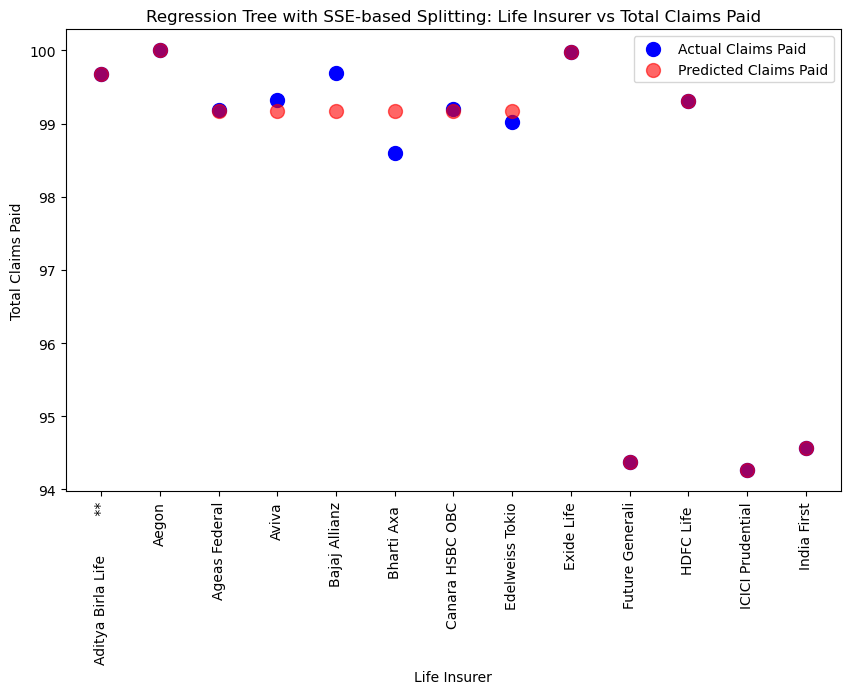

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("Death_Claim_2018-2019_1.csv")


df["Claims Paid Ratio % No."] = df["Claims Paid Ratio % No."].str.replace('%', '').astype(float)



# Group by "Life Insurer" and aggregate Claims Paid
insurer_claims = df.groupby("Life Insurer")["Claims Paid Ratio % No."].sum().reset_index()
insurer_claims.columns = ['Life Insurer', 'Total Claims Paid']

# Encode the categorical variable "Life Insurer"
insurer_claims['Insurer_Code'] = np.arange(len(insurer_claims))

# Extract the encoded "Life Insurer" (X) and "Total Claims Paid" (Y)
X = insurer_claims[['Insurer_Code']].values  # X should be 2D for consistent shape
Y = insurer_claims['Total Claims Paid'].values

class RegressionTree:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.tree = None

    def fit(self, X, Y):
        self.tree = self._build_tree(X, Y)

    def _build_tree(self, X, Y, depth=0):
        num_samples, num_features = X.shape
        if num_samples == 0 or (self.max_depth and depth >= self.max_depth):
            return np.mean(Y)

        best_split = self._find_best_split(X, Y)
        if best_split is None:
            return np.mean(Y)

        left_indices = X[:, best_split['feature']] < best_split['threshold']
        right_indices = X[:, best_split['feature']] >= best_split['threshold']

        left_branch = self._build_tree(X[left_indices], Y[left_indices], depth + 1)
        right_branch = self._build_tree(X[right_indices], Y[right_indices], depth + 1)

        return {
            'feature': best_split['feature'],
            'threshold': best_split['threshold'],
            'left': left_branch,
            'right': right_branch
        }

    def _find_best_split(self, X, Y):
        best_sse_reduction = -float('inf')
        best_split = None
        num_samples, num_features = X.shape

        sse_total = self._sum_squared_error(Y)

        for feature in range(num_features):
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                left_indices = X[:, feature] < threshold
                right_indices = X[:, feature] >= threshold

                if len(Y[left_indices]) == 0 or len(Y[right_indices]) == 0:
                    continue

                sse_left = self._sum_squared_error(Y[left_indices])
                sse_right = self._sum_squared_error(Y[right_indices])
                sse_reduction = sse_total - (sse_left + sse_right)

                if sse_reduction > best_sse_reduction:
                    best_sse_reduction = sse_reduction
                    best_split = {'feature': feature, 'threshold': threshold}

        return best_split

    def _sum_squared_error(self, Y):
        mean_Y = np.mean(Y)
        return np.sum((Y - mean_Y) ** 2)

    def predict(self, X):
        return np.array([self._predict_single(sample, self.tree) for sample in X])

    def _predict_single(self, sample, tree):
        if isinstance(tree, dict):
            feature = tree['feature']
            threshold = tree['threshold']
            if sample[feature] < threshold:
                return self._predict_single(sample, tree['left'])
            else:
                return self._predict_single(sample, tree['right'])
        else:
            return tree

# Initialize and fit the Regression Tree
model = RegressionTree(max_depth=3)
model.fit(X, Y)

# Predict Y values using the fitted model
Y_pred = model.predict(X)

# Plot the actual data points
plt.figure(figsize=(10, 6))
plt.scatter(insurer_claims['Insurer_Code'], Y, color='blue', label='Actual Claims Paid', s=100)
plt.scatter(insurer_claims['Insurer_Code'], Y_pred, color='red', label='Predicted Claims Paid', s=100, alpha=0.6)

# Customize the plot
plt.xticks(insurer_claims['Insurer_Code'], insurer_claims['Life Insurer'], rotation=90)
plt.xlabel('Life Insurer')
plt.ylabel('Total Claims Paid')
plt.title('Regression Tree with SSE-based Splitting: Life Insurer vs Total Claims Paid')
plt.legend()

# Display the plot
plt.show()